<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общие-выводы-исследования" data-toc-modified-id="Общие-выводы-исследования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы исследования</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

**Цели исследования:**

1. Построить модель с предельно большим значением F1-меры.
2. Достичь F1-меры не менее 0.59.
3. Проверить F1-меру на тестовой выборке.
4. Измерять AUC-ROC, сравнивать её значение с F1-мерой.

**Ход исследования**
<br>
1. Изучение общей информации, подготовка данных 
<br>
Загрузить данные, изучить их, подготовить к дальнейшей работе.
<br>
2. Исследование задачи.
<br>
На этом этапе исследуем баланс классов, приступим к обучению модели.
<br>
3. Борьба с дисбалансом. 
<br>
Учтём дисбаланс классов и улучшим качество модели, обучим разные модели, выберем лучшую.
<br>
4. Тестирование модели.
<br>
Проведём финальное тестирование на тестовой выборке.
<br>
5. Чек-лист готовности проекта. 
<br>
Проверим качество выполненной работы по чек-листу.
<br>
**Описание данных**
<br>
<br>
*Признаки:*
<br>
<br>
RowNumber — индекс строки в данных <br>
CustomerId — уникальный идентификатор клиента<br>
Surname — фамилия<br>
CreditScore — кредитный рейтинг<br>
Geography — страна проживания<br>
Gender — пол<br>
Age — возраст<br>
Tenure — сколько лет человек является клиентом банка<br>
Balance — баланс на счёте<br>
NumOfProducts — количество продуктов банка, используемых клиентом<br>
HasCrCard — наличие кредитной карты<br>
IsActiveMember — активность клиента<br>
EstimatedSalary — предполагаемая зарплата<br>
<br>
*Целевой признак:*
<br>
<br>
Exited — факт ухода клиента<br>

## Подготовка данных

**Загрузка данных и необходимых библиотек**

In [390]:
!pip install scikit-learn==1.1.3
!pip install imblearn

# загрузим все необходимые библиотеки 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
import math
import time
import warnings
warnings.filterwarnings('ignore')
RANDOM_STATE = 42

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    recall_score, 
    precision_recall_curve, 
    roc_curve, 
    roc_auc_score,
    precision_score, 
    confusion_matrix, 
    plot_confusion_matrix, 
    f1_score
)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE

In [391]:
data = pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Изучение данных о датасете**

In [392]:
# посмотрим информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [393]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [394]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,9091.0,NaN,NaN,NaN,4.99769,2.894723,0.0,2.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [395]:
# проверяем пропуски
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [396]:
# посмотрим, есть ли дубликаты
data.duplicated().sum()

0

**Предобработка данных**

Данные датасета достаточны и адекватны, содержат 10000 строк, явных пропусков не обнаружено.
Для дальнейшей работы с датафреймом необходимо:
1. Удалить столбцы RowNumber, CustomerId, Surname.
2. Методом OHE обработать столбцы Geography, Gender.
3. Обработать пропуски в стобце Tenure.

In [397]:
# удалим столбцы, не представляющие ценности для модели
del_columns=['RowNumber','CustomerId','Surname']
data=data.drop(del_columns,axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [398]:
# избавимся от категориальных признаков (столбцы Geography, Gender)
data = pd.get_dummies(data, drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [399]:
# заполним пропуски в столбце медианными значениями
data['Tenure'] = data['Tenure'].median()

**Создание выборок**

Разобъём датафрейм на выборки:
- обучающую features_train, target_train
- валидационную features_valid, target_valid
- тестовую features_test, target_test

In [400]:
features = data.drop('Exited', axis=1)
target = data['Exited']

# валидационная - 60%
features_train, features_valid_test, target_train, target_valid_test = train_test_split(features,
                                                    target,
                                                    train_size=0.6,
                                                    random_state=12345)
# оставшиеся 40% делим пополам
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test,
                                                    target_valid_test,
                                                    train_size=0.5,
                                                    random_state=12345)

print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)


(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


In [404]:
# cформируем численные признаки для масштабирования методом scaler
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [405]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])


StandardScaler()

In [406]:
# масштабируем численные признаки для обучающей выборки

features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

# pd.options.mode.chained_assignment = None

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,0.0,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,0.0,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,0.0,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.0,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,0.0,1.140475,-0.891560,0,0,1.524268,1,0,0


In [407]:
# масштабируем численные признаки для валидационной выборки

features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,-0.699824,-0.373192,0.0,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,0.0,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,0.0,0.438711,-0.891560,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,0.0,1.239884,-0.891560,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,0.0,-1.233163,0.830152,1,0,1.358533,0,1,1


In [408]:
# масштабируем численные признаки для тестовой выборки

features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,0.0,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,0.0,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,0.0,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,0.0,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,0.0,0.615625,-0.891560,0,1,-1.070919,0,0,1


## Исследование задачи

**Проверка соотношения классов**

Проверим сколько классов "1" и "0"

0    0.7963
1    0.2037
Name: Exited, dtype: float64


Text(0.5, 1.0, 'Соотношение классов')

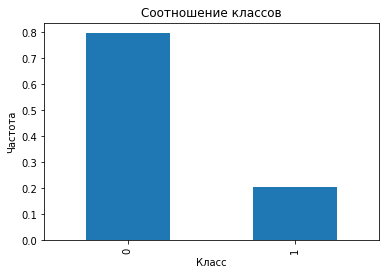

In [409]:
class_frequency = data['Exited'].value_counts(normalize=1)
print(class_frequency)
class_frequency.plot(kind='bar')

plt.xlabel('Класс')
plt.ylabel('Частота')
plt.title('Соотношение классов')

Соотношение классов распределилось как 4:1. Это довольный сильный дисбаланс.

In [410]:
# создадим константную модель, которая любому объекту прогнозирует класс «0»
target_pred_constant = pd.Series([0] * len(target))

print(accuracy_score(target, target_pred_constant))

0.7963


**Обучение моделей без учёта дисбаланса**

До борьбы с дисбалансом проверим качество моделей:
- обучим несколько моделей; 
- подберём оптимальные гиперпараметры;
- проверим ключевые метрики: Accuracy, Precision, Recall, F1, AUC-ROC;
- построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN; 
- построим ROC-кривую для наглядности.

**Модель: дерево решений**


In [411]:
# дерево решений

for depth in range(1,20,1):
    model_DTC = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_DTC.fit(features_train, target_train)
    predicted_valid_DTC = model_DTC.predict(features_valid)
    print("depth=", depth, "F1_Score = ", f1_score(target_valid, predicted_valid_DTC))


depth= 1 F1_Score =  0.0
depth= 2 F1_Score =  0.5217391304347825
depth= 3 F1_Score =  0.4234875444839857
depth= 4 F1_Score =  0.5528700906344411
depth= 5 F1_Score =  0.5406249999999999
depth= 6 F1_Score =  0.5701219512195123
depth= 7 F1_Score =  0.5471406491499228
depth= 8 F1_Score =  0.5306748466257668
depth= 9 F1_Score =  0.5563689604685212
depth= 10 F1_Score =  0.52
depth= 11 F1_Score =  0.5087483176312247
depth= 12 F1_Score =  0.5000000000000001
depth= 13 F1_Score =  0.5142118863049095
depth= 14 F1_Score =  0.5056603773584907
depth= 15 F1_Score =  0.4937343358395989
depth= 16 F1_Score =  0.5012106537530266
depth= 17 F1_Score =  0.48763250883392223
depth= 18 F1_Score =  0.4904306220095694
depth= 19 F1_Score =  0.489795918367347


Лучшее значение глубины дерева = 6, качество модели (F1) = 0.5701219512195123

In [412]:
# обучим модель решающего дерева оптимальным гиперпараметрам
model_DTC = DecisionTreeClassifier(random_state=12345,max_depth=6)
model_DTC.fit(features_train, target_train)
predicted_valid_DTC = model_DTC.predict(features_valid)

In [413]:
print("accuracy модели дерева решений =", accuracy_score(target_valid, predicted_valid_DTC))
print("recall модели дерева решений =" , recall_score(target_valid, predicted_valid_DTC))
print("precision модели дерева решений =", precision_score(target_valid, predicted_valid_DTC))
print("F1 модели дерева решений =", f1_score(target_valid, predicted_valid_DTC))

accuracy модели дерева решений = 0.859
recall модели дерева решений = 0.4473684210526316
precision модели дерева решений = 0.7857142857142857
F1 модели дерева решений = 0.5701219512195123


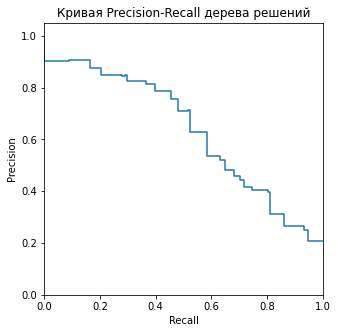

In [414]:
# построим PR-кривую для дерева решений
probabilities_valid_DTC = model_DTC.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid_DTC[:, 1])

plt.figure(figsize=(5, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall дерева решений')
plt.show() 

In [415]:
# вычислим AUC-ROC для решающего дерева
probabilities_DTC = model_DTC.predict_proba(features_valid)
probabilities_one_valid_DTC = probabilities_DTC[:, 1]
auc_roc_DTC = roc_auc_score(target_valid, probabilities_one_valid_DTC)
fpr_DTC, tpr_DTC, thresholds = roc_curve(target_valid, probabilities_one_valid_DTC)

print('AUC-ROC дерева решений =', auc_roc_DTC)


AUC-ROC дерева решений = 0.8169100345392846


При глубине дерева 6 получили лучшие результаты:
- F1 = 0.5701219512195123
- AUC-ROC = 0.8169100345392846

In [416]:
# построим матрицу ошибок для дерева решений
model_DTC = DecisionTreeClassifier(random_state=12345,max_depth=6)
model_DTC.fit(features_train, target_train)
DTC_prediction = model_DTC.predict(features_valid)
confusion_matrix(target_valid, DTC_prediction)

array([[1531,   51],
       [ 231,  187]])

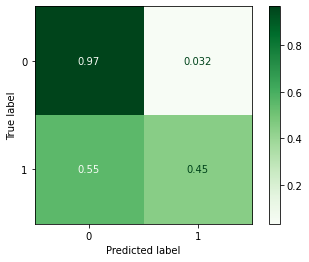

In [417]:
plot_confusion_matrix(estimator=model_DTC, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Greens')

**Модель: случайный лес**

In [418]:
# случайный лес

for depth in range(1,20,1):
    model_RFC = RandomForestClassifier(max_depth=depth, random_state=12345, n_estimators = 50)
    model_RFC.fit(features_train, target_train)
    predicted_valid_RFC = model_RFC.predict(features_valid)
    print("depth=", depth, "F1_Score = ", f1_score(target_valid, predicted_valid_RFC))


depth= 1 F1_Score =  0.0
depth= 2 F1_Score =  0.10430839002267574
depth= 3 F1_Score =  0.34108527131782945
depth= 4 F1_Score =  0.4272890484739676
depth= 5 F1_Score =  0.4991511035653651
depth= 6 F1_Score =  0.54281098546042
depth= 7 F1_Score =  0.5632
depth= 8 F1_Score =  0.5605095541401274
depth= 9 F1_Score =  0.5579937304075234
depth= 10 F1_Score =  0.5588697017268446
depth= 11 F1_Score =  0.5723076923076923
depth= 12 F1_Score =  0.5644171779141105
depth= 13 F1_Score =  0.5740181268882175
depth= 14 F1_Score =  0.574436090225564
depth= 15 F1_Score =  0.5773809523809523
depth= 16 F1_Score =  0.5709923664122137
depth= 17 F1_Score =  0.562406015037594
depth= 18 F1_Score =  0.5667166416791604
depth= 19 F1_Score =  0.5705705705705705


Лучшее значение глубины = 15, качество модели (F1) = 0.5773809523809523

In [419]:
for estim in range(1,55,2):
    model_RFC=RandomForestClassifier(max_depth=15,n_estimators=estim,random_state=1234)
    model_RFC.fit(features_train, target_train)
    predicted_valid_RFC = model_RFC.predict(features_valid)
    print('estim',estim,'F1:',f1_score(target_valid,predicted_valid_RFC))

estim 1 F1: 0.48189762796504365
estim 3 F1: 0.5170068027210883
estim 5 F1: 0.5596590909090909
estim 7 F1: 0.5742296918767508
estim 9 F1: 0.5710227272727273
estim 11 F1: 0.5796269727403156
estim 13 F1: 0.5882352941176471
estim 15 F1: 0.5780346820809248
estim 17 F1: 0.581021897810219
estim 19 F1: 0.5805515239477503
estim 21 F1: 0.5760233918128654
estim 23 F1: 0.5693215339233039
estim 25 F1: 0.5684523809523809
estim 27 F1: 0.5748148148148149
estim 29 F1: 0.5824665676077266
estim 31 F1: 0.5765230312035662
estim 33 F1: 0.5761194029850746
estim 35 F1: 0.5744047619047619
estim 37 F1: 0.5697151424287856
estim 39 F1: 0.5787106446776611
estim 41 F1: 0.5787106446776611
estim 43 F1: 0.5816023738872403
estim 45 F1: 0.5824665676077266
estim 47 F1: 0.5842026825633383
estim 49 F1: 0.5727136431784108
estim 51 F1: 0.5833333333333334
estim 53 F1: 0.5812220566318926


Лучшее значение n_estimators=13, при котором значение F1 = 0.5882352941176471.
<br>

In [420]:
# обучим модель случайного леса с оптимальным гиперпараметрам
model_RFC = RandomForestClassifier(max_depth=15, random_state=12345, n_estimators = 13)
model_RFC.fit(features_train, target_train)
predicted_valid_RFC = model_RFC.predict(features_valid)

In [421]:
print("accuracy модели случайного леса =", accuracy_score(target_valid, predicted_valid_RFC))
print("recall модели случайного леса =" , recall_score(target_valid, predicted_valid_RFC))
print("precision модели случайного леса =", precision_score(target_valid, predicted_valid_RFC))
print("F1 модели случайного леса =", f1_score(target_valid, predicted_valid_RFC))

accuracy модели случайного леса = 0.859
recall модели случайного леса = 0.48325358851674644
precision модели случайного леса = 0.753731343283582
F1 модели случайного леса = 0.5889212827988337


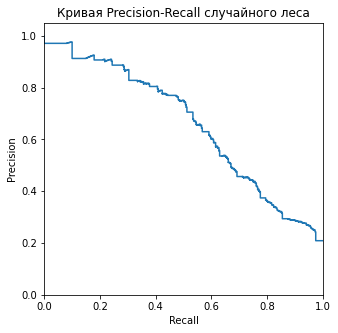

In [422]:
# построим PR-кривую для случайного леса
probabilities_valid_RFC = model_RFC.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid_RFC[:, 1])

plt.figure(figsize=(5, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall случайного леса')
plt.show() 

In [423]:
# вычислим AUC-ROC для случайного леса
probabilities_RFC = model_RFC.predict_proba(features_valid)
probabilities_one_valid_RFC = probabilities_RFC[:, 1]
auc_roc_RFC = roc_auc_score(target_valid, probabilities_one_valid_RFC)
fpr_RFC, tpr_RFC, thresholds = roc_curve(target_valid, probabilities_one_valid_RFC)

print('AUC-ROC случайного леса =', auc_roc_RFC)

AUC-ROC случайного леса = 0.8221007567188283


In [424]:
# построим матрицу ошибок для случайного леса
model_RFC = RandomForestClassifier(n_estimators=13,random_state=1234)
model_RFC.fit(features_train, target_train)
RFC_prediction = model_RFC.predict(features_valid)
confusion_matrix(target_valid, RFC_prediction)

array([[1503,   79],
       [ 211,  207]])

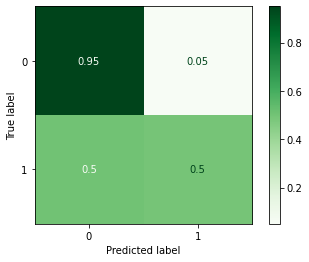

In [425]:
plot_confusion_matrix(estimator=model_RFC, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Greens')

**Модель: логистическая регрессия**

In [426]:
# логистическая регрессия

model_LR=LogisticRegression().fit(features_train,target_train)
predicted_valid_LR = model_LR.predict(features_valid)

In [427]:
print("accuracy модели логистической регрессии =", accuracy_score(target_valid, predicted_valid_LR))
print("recall модели логистической регрессии =" , recall_score(target_valid, predicted_valid_LR))
print("precision модели логистической регрессии =", precision_score(target_valid, predicted_valid_LR))
print("F1 модели логистической регрессии =", f1_score(target_valid, predicted_valid_LR))

accuracy модели логистической регрессии = 0.8025
recall модели логистической регрессии = 0.22727272727272727
precision модели логистической регрессии = 0.5688622754491018
F1 модели логистической регрессии = 0.3247863247863248


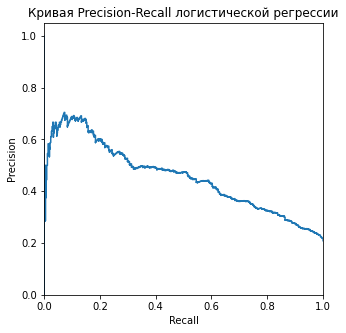

In [428]:
# построим PR-кривую для модели логистической регрессии
probabilities_valid_LR = model_LR.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid_LR[:, 1])

plt.figure(figsize=(5, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall логистической регрессии')
plt.show() 

In [429]:
# вычислим AUC-ROC для логистической регрессии
probabilities_LR = model_LR.predict_proba(features_valid)
probabilities_one_valid_LR = probabilities_LR[:, 1]
auc_roc_LR = roc_auc_score(target_valid, probabilities_one_valid_LR)
fpr_LR, tpr_LR, thresholds = roc_curve(target_valid, probabilities_one_valid_LR)

print('AUC-ROC логистической регрессии =', auc_roc_LR)

AUC-ROC логистической регрессии = 0.7576700197799406


In [430]:
# построим матрицу ошибок для логистической регрессии
model_LR = LogisticRegression(solver = 'liblinear')
model_LR.fit(features_train, target_train)
LR_prediction = model_LR.predict(features_valid)
confusion_matrix(target_valid, LR_prediction)


array([[1511,   71],
       [ 323,   95]])

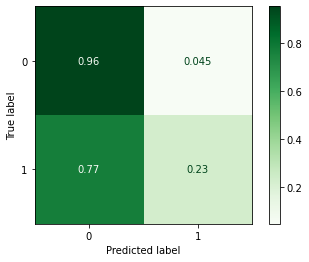

In [431]:
plot_confusion_matrix(estimator=model_LR, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Greens')

<Figure size 432x288 with 0 Axes>

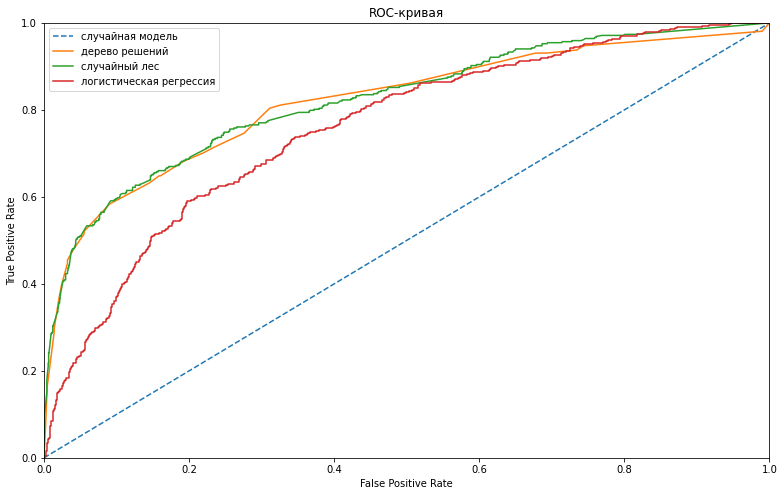

In [432]:
# строим ROC-кривые для трёх моделей
plt.figure()

plt.figure(figsize=(13,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_DTC,tpr_DTC)
plt.plot(fpr_RFC,tpr_RFC)
plt.plot(fpr_LR,tpr_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('случайная модель','дерево решений','случайный лес','логистическая регрессия'),
           loc= 'upper left') 
plt.show()

**Вывод:**
- лучшее значение метрики F1 (качество) показала модель случайного леса;
- наилучшей точности достигли модели решающего дерева и случайного леса (0.859) да и точность модели логистической регрессии довольно высокая (0.8025);
- анализ графиков точности и полноты (PR-кривых) показал, что лучший результ у модели случайного леса (и он почти идентичен кривой дерева решений), худший у логистической регресии;
- матрицы ошибок наглядно показали, что у всех трех моделей достаточно сильный дисбаланс классов.

## Борьба с дисбалансом

Как мы выяснили ранее, наблюдается сильный дисбаланс, а именно их распределение составило 80% и 20%.
<br>
Придадим объектам редкого класса больший вес.

**Взвешивание классов**

In [433]:
# дерево решений
max_depth_values = [1, 100, 1]
class_weight_values = [None, 'balanced']

best_f1_score = 0
best_params = {}

# перебор всех комбинаций гиперпараметров
for max_depth in max_depth_values:
    for class_weight in class_weight_values:
        # создание модели с текущими гиперпараметрами
        model_DTC = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, class_weight=class_weight)
        model_DTC.fit(features_train, target_train)
        predicted_valid_DTC = model_DTC.predict(features_valid)
        
        # вычисление F1-меры для текущих гиперпараметров
        f1 = f1_score(target_valid, predicted_valid_DTC)
        
        # сравнение с лучшим результатом и обновление, если необходимо
        if f1 > best_f1_score:
            best_f1_score = f1
            best_params = {'max_depth': max_depth, 'class_weight': class_weight}

# Вывод лучших гиперпараметров и значения F1-меры
print("Лучшие гиперпараметры дерева решений:", best_params)
print("F1-мера на валидационной выборке дерева решений:", best_f1_score)


Лучшие гиперпараметры дерева решений: {'max_depth': 100, 'class_weight': 'balanced'}
F1-мера на валидационной выборке дерева решений: 0.5104294478527607


In [434]:
# случайный лес
max_depth_values = [10, 15, 20]
n_estimators_values = [50, 100, 150]
class_weight_values = [None, 'balanced']

best_f1_score = 0
best_params = {}

# Перебор всех комбинаций гиперпараметров
for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        for class_weight in class_weight_values:
            # Создание модели с текущими гиперпараметрами
            model_RFC = RandomForestClassifier(max_depth=max_depth, random_state=12345, n_estimators=n_estimators, class_weight=class_weight)
            model_RFC.fit(features_train, target_train)
            predicted_valid_RFC = model_RFC.predict(features_valid)
            
            # Вычисление F1-меры для текущих гиперпараметров
            f1 = f1_score(target_valid, predicted_valid_RFC)
            
            # Сравнение с лучшим результатом и обновление, если необходимо
            if f1 > best_f1_score:
                best_f1_score = f1
                best_params = {'max_depth': max_depth, 'n_estimators': n_estimators, 'class_weight': class_weight}

# Вывод лучших гиперпараметров и значения F1-меры
print("Лучшие гиперпараметры случайного леса:", best_params)
print("F1-мера на валидационной выборке случайного леса:", best_f1_score)

Лучшие гиперпараметры случайного леса: {'max_depth': 10, 'n_estimators': 150, 'class_weight': 'balanced'}
F1-мера на валидационной выборке случайного леса: 0.6181384248210025


In [435]:
# логистическая регрессия
class_weight_values = [None, 'balanced']
solver_values = ['liblinear', 'saga']

best_f1_score = 0
best_params = {}

# Перебор всех комбинаций гиперпараметров
for class_weight in class_weight_values:
    for solver in solver_values:
        # Создание модели с текущими гиперпараметрами
        model_LR = LogisticRegression(random_state=12345, solver=solver, class_weight=class_weight)
        model_LR.fit(features_train, target_train)
        predicted_valid_LR = model_LR.predict(features_valid)
        
        # Вычисление F1-меры для текущих гиперпараметров
        f1 = f1_score(target_valid, predicted_valid_LR)
        
        # Сравнение с лучшим результатом и обновление, если необходимо
        if f1 > best_f1_score:
            best_f1_score = f1
            best_params = {'class_weight': class_weight, 'solver': solver}

# Вывод лучших гиперпараметров и значения F1-меры
print("Лучшие гиперпараметры логистической регрессии:", best_params)
print("F1-мера на валидационной выборке логистической регрессии:", best_f1_score)

Лучшие гиперпараметры логистической регрессии: {'class_weight': 'balanced', 'solver': 'liblinear'}
F1-мера на валидационной выборке логистической регрессии: 0.4875536480686695


Добавление аргумента class_weight значения 'balanced' для моделей случайного леса и логистической регресии увеличило значение F1, а для моделей дерева решений - уменьшило.


**Техника upsampling**

Сделаем объекты редкого класса не такими редкими с помощью техники upsampling.

In [436]:
oversample = SMOTE(random_state=RANDOM_STATE)

features_train_up, target_train_up = oversample.fit_resample(features_train_encoded, target_train)

print(features_train_up.shape)
print(target_train_up.shape)

(9608, 5)
(9608,)


In [437]:
def upsample(features, target, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target[target == 0]] + [target[target == 1]] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)



(9588, 11)
(9588,)


In [438]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
target_upsampled.value_counts(normalize=True)


0    0.501043
1    0.498957
Name: Exited, dtype: float64

Text(0.5, 1.0, 'Соотношение классов после апсемплинга')

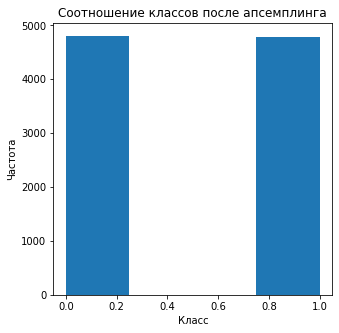

In [439]:
target_upsampled.plot(kind ='hist', bins=4, figsize=(5,5))

plt.xlabel('Класс')
plt.ylabel('Частота')
plt.title('Соотношение классов после апсемплинга')

Баланс классов налажен.

**Техника downsampling**

Сделаем объекты частого класса не такими частыми с помощью техники downsampling

In [440]:
def downsample(features,target,fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
    [features_zeros.sample(frac=0.4, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
    [target_zeros.sample(frac=0.4, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
    features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.25)
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)


(3118, 11)
(3118,)


In [441]:
features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.25)
target_downsampled.value_counts(normalize=True)


0    0.616421
1    0.383579
Name: Exited, dtype: float64

<AxesSubplot:ylabel='Frequency'>

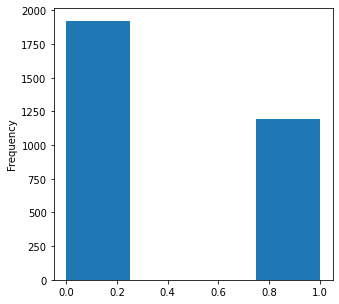

In [442]:
target_downsampled.plot(kind ='hist', bins=4, figsize=(5,5))

**Вывод:**
<br>
- методика увеличения выборки наладила баланс классов, а вот методика уменьшения выборки показала себя хуже;
- устранён дисбаланс классов обучающей выборки методом upsampling — в 4 раза увеличили количество значений позитивного класса.

**Обучение модели на сбалансированной выборке**

Обучим модели на сбалансированной выборке

In [487]:
# дерево решений
max_depth_values = [1, 100, 1]
class_weight_values = [None, 'balanced']

best_f1_score = 0
best_params = {}

# перебор всех комбинаций гиперпараметров
for max_depth in max_depth_values:
    for class_weight in class_weight_values:
        # создание модели с текущими гиперпараметрами
        model_DTC_upsampled = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, class_weight=class_weight)
        model_DTC_upsampled.fit(features_train, target_train)
        predicted_valid_DTC_upsampled = model_DTC_upsampled.predict(features_valid)
        
        # вычисление F1-меры для текущих гиперпараметров
        f1 = f1_score(target_valid, predicted_valid_DTC_upsampled)
        
        # сравнение с лучшим результатом и обновление, если необходимо
        if f1 > best_f1_score:
            best_f1_score = f1
            best_params = {'max_depth': max_depth, 'class_weight': class_weight}

# Вывод лучших гиперпараметров и значения F1-меры
print("Лучшие гиперпараметры дерева решений:", best_params)
print("F1-мера на валидационной выборке дерева решений:", best_f1_score)

Лучшие гиперпараметры дерева решений: {'max_depth': 100, 'class_weight': 'balanced'}
F1-мера на валидационной выборке дерева решений: 0.5104294478527607


In [492]:
print("accuracy модели дерева решений на сбалансированной выборке =", accuracy_score(
    target_valid, predicted_valid_DTC_upsampled))
print("recall модели дерева решений на сбалансированной выборке =" , recall_score(
    target_valid, predicted_valid_DTC_upsampled))
print("precision модели дерева решений на сбалансированной выборке =", precision_score(
    target_valid, predicted_valid_DTC_upsampled))

accuracy модели дерева решений на сбалансированной выборке = 0.7545
recall модели дерева решений на сбалансированной выборке = 0.5861244019138756
precision модели дерева решений на сбалансированной выборке = 0.4351687388987567


In [485]:
# вычислим AUC-ROC для решающего дерева на сбалансированной выборке
probabilities_DTC_upsampled = model_DTC_upsampled.predict_proba(features_valid)
probabilities_one_valid_DTC_upsampled = probabilities_DTC_upsampled[:, 1]
auc_roc_DTC_upsampled = roc_auc_score(target_valid, probabilities_one_valid_DTC_upsampled)
fpr_DTC_upsampled, tpr_DTC_upsampled, thresholds = roc_curve(
    target_valid, probabilities_one_valid_DTC_upsampled)

print('AUC-ROC решающего дерева на сбалансированной выборке =', auc_roc_DTC_upsampled)

AUC-ROC решающего дерева на сбалансированной выборке = 0.6925565119556736


In [482]:
# случайный лес
max_depth_values = [10, 15, 20]
n_estimators_values = [50, 100, 150]
class_weight_values = [None, 'balanced']

best_f1_score = 0
best_params = {}

# Перебор всех комбинаций гиперпараметров
for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        for class_weight in class_weight_values:
            # Создание модели с текущими гиперпараметрами
            model_RFC_upsampled = RandomForestClassifier(max_depth=max_depth, random_state=12345, n_estimators=n_estimators, class_weight=class_weight)
            model_RFC_upsampled.fit(features_train, target_train)
            predicted_valid_RFC_upsampled = model_RFC_upsampled.predict(features_valid)
            
            # Вычисление F1-меры для текущих гиперпараметров
            f1 = f1_score(target_valid, predicted_valid_RFC_upsampled)
            
            # Сравнение с лучшим результатом и обновление, если необходимо
            if f1 > best_f1_score:
                best_f1_score = f1
                best_params = {'max_depth': max_depth, 'n_estimators': n_estimators, 'class_weight': class_weight}

# Вывод лучших гиперпараметров и значения F1-меры
print("Лучшие гиперпараметры случайного леса:", best_params)
print("F1-мера на валидационной выборке случайного леса:", best_f1_score)

Лучшие гиперпараметры случайного леса: {'max_depth': 10, 'n_estimators': 150, 'class_weight': 'balanced'}
F1-мера на валидационной выборке случайного леса: 0.6181384248210025


In [493]:
print("accuracy модели случайного леса на сбалансированной выборке =", accuracy_score(
    target_valid, predicted_valid_RFC_upsampled))
print("recall модели случайного леса на сбалансированной выборке =" , recall_score(
    target_valid, predicted_valid_RFC_upsampled))
print("precision модели случайного леса на сбалансированной выборке =", precision_score(
    target_valid, predicted_valid_RFC_upsampled))

accuracy модели случайного леса на сбалансированной выборке = 0.8585
recall модели случайного леса на сбалансированной выборке = 0.4449760765550239
precision модели случайного леса на сбалансированной выборке = 0.7848101265822784


In [478]:
# вычислим AUC-ROC для случайного леса на сбалансированной выборке
probabilities_RFC_upsampled = model_RFC_upsampled.predict_proba(features_valid)
probabilities_one_valid_RFC_upsampled = probabilities_RFC_upsampled[:, 1]
auc_roc_RFC_upsampled = roc_auc_score(target_valid, probabilities_one_valid_RFC_upsampled)
fpr_RFC_upsampled, tpr_RFC_upsampled, thresholds = roc_curve(
    target_valid, probabilities_one_valid_RFC_upsampled)

print('AUC-ROC случайного леса на сбалансированной выборке =', auc_roc_RFC_upsampled)


AUC-ROC случайного леса на сбалансированной выборке = 0.8277806846158035


In [488]:
# логистическая регрессия
class_weight_values = [None, 'balanced']
solver_values = ['liblinear', 'saga']

best_f1_score = 0
best_params = {}

# Перебор всех комбинаций гиперпараметров
for class_weight in class_weight_values:
    for solver in solver_values:
        # Создание модели с текущими гиперпараметрами
        model_LR_upsampled = LogisticRegression(random_state=12345, solver=solver, class_weight=class_weight)
        model_LR_upsampled.fit(features_train, target_train)
        predicted_valid_LR_upsampled = model_LR.predict(features_valid)
        
        # Вычисление F1-меры для текущих гиперпараметров
        f1 = f1_score(target_valid, predicted_valid_LR_upsampled)
        
        # Сравнение с лучшим результатом и обновление, если необходимо
        if f1 > best_f1_score:
            best_f1_score = f1
            best_params = {'class_weight': class_weight, 'solver': solver}

# Вывод лучших гиперпараметров и значения F1-меры
print("Лучшие гиперпараметры логистической регрессии:", best_params)
print("F1-мера на валидационной выборке логистической регрессии:", best_f1_score)

Лучшие гиперпараметры логистической регрессии: {'class_weight': None, 'solver': 'liblinear'}
F1-мера на валидационной выборке логистической регрессии: 0.4875536480686695


In [466]:
# логистическая регрессия
class_weight_values = [None, 'balanced']
solver_values = ['liblinear', 'saga']

best_f1_score = 0
best_params = {}

# Перебор всех комбинаций гиперпараметров
for class_weight in class_weight_values:
    for solver in solver_values:
        # Создание модели с текущими гиперпараметрами
        model_LR = LogisticRegression(random_state=12345, solver=solver, class_weight=class_weight)
        model_LR.fit(features_train, target_train)
        predicted_valid_LR = model_LR.predict(features_valid)
        
        # Вычисление F1-меры для текущих гиперпараметров
        f1 = f1_score(target_valid, predicted_valid_LR)
        
        # Сравнение с лучшим результатом и обновление, если необходимо
        if f1 > best_f1_score:
            best_f1_score = f1
            best_params = {'class_weight': class_weight, 'solver': solver}

# Вывод лучших гиперпараметров и значения F1-меры
print("Лучшие гиперпараметры логистической регрессии:", best_params)
print("F1-мера на валидационной выборке логистической регрессии:", best_f1_score)

Лучшие гиперпараметры логистической регрессии: {'class_weight': 'balanced', 'solver': 'liblinear'}
F1-мера на валидационной выборке логистической регрессии: 0.4875536480686695


In [489]:
print("accuracy модели логистической регрессии на сбалансированной выборке =", accuracy_score(
    target_valid, predicted_valid_LR_upsampled))
print("recall модели логистической регрессии на сбалансированной выборке =" , recall_score(
    target_valid, predicted_valid_LR_upsampled))
print("precision модели логистической регрессии на сбалансированной выборке =", precision_score(
    target_valid, predicted_valid_LR_upsampled))
print("F1 модели логистической регрессии на сбалансированной выборке =", f1_score(
    target_valid, predicted_valid_LR_upsampled))

accuracy модели логистической регрессии на сбалансированной выборке = 0.7015
recall модели логистической регрессии на сбалансированной выборке = 0.6794258373205742
precision модели логистической регрессии на сбалансированной выборке = 0.38018741633199465
F1 модели логистической регрессии на сбалансированной выборке = 0.4875536480686695


In [490]:
# вычислим AUC-ROC для логистической регрессии на сбалансированной выборке
probabilities_LR_upsampled = model_LR_upsampled.predict_proba(features_valid)
probabilities_one_valid_LR_upsampled = probabilities_LR_upsampled[:, 1]
auc_roc_LR_upsampled = roc_auc_score(target_valid, probabilities_one_valid_LR_upsampled)
fpr_LR_upsampled, tpr_LR_upsampled, thresholds = roc_curve(
    target_valid, probabilities_one_valid_LR_upsampled)

print('AUC-ROC логистической регрессии на сбалансированной выборке =', auc_roc_LR_upsampled)


AUC-ROC логистической регрессии на сбалансированной выборке = 0.7626029071068662


<Figure size 432x288 with 0 Axes>

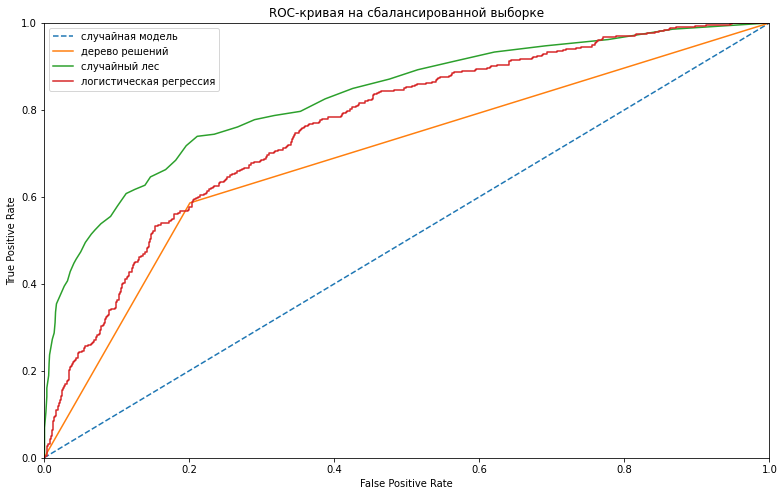

In [491]:
# построим ROC-кривые для трёх моделей на сбалансированной выборке
plt.figure()

plt.figure(figsize=(13,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_DTC_upsampled,tpr_DTC_upsampled)
plt.plot(fpr_RFC_upsampled,tpr_RFC_upsampled)
plt.plot(fpr_LR_upsampled,tpr_LR_upsampled)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая на сбалансированной выборке')
plt.legend(('случайная модель','дерево решений','случайный лес','логистическая регрессия'),
           loc= 'upper left') 
plt.show()

Лучшие результаты на сбалансированной выборке показывает модель случайного леса, берём её для финального тестирования.

## Тестирование модели

Приступаем к тестированию выбранной модели случайного леса на тестовой выборке.

**Объединение валидационной и тестовой выборок**

In [454]:
# объединим валидационную и тестовую выборки 
new_features_test = pd.concat([features_test, features_valid], axis=0, ignore_index=True)
new_target_test = pd.concat([target_test, target_valid], axis=0, ignore_index=True)

In [455]:
# проверим как прошло объединение
print(target_train.shape)
print(new_target_test.shape)


(6000,)
(4000,)


**Финальная модель**

In [495]:
# проверка финальной модели случайного леса с оптимальными параметрами на тестовой выборке

best_params = {'max_depth': 10, 'n_estimators': 150, 'class_weight': 'balanced'}

model_RFC_final = RandomForestClassifier(random_state=12345, **best_params)
model_RFC_final.fit(features_train, target_train)

predicted_valid_RFC_final = model_RFC_final.predict(features_valid)
best_f1_score = f1_score(target_valid, predicted_valid_RFC_final)

predicted_test_RFC_final = model_RFC_final.predict(features_test)
f1_test = f1_score(target_test, predicted_test_RFC_final)

print("Лучшие гиперпараметры случайного леса:", best_params)
print("F1-мера на валидационной выборке случайного леса:", best_f1_score)
print("F1-мера на тестовой выборке случайного леса:", f1_test)

Лучшие гиперпараметры случайного леса: {'max_depth': 10, 'n_estimators': 150, 'class_weight': 'balanced'}
F1-мера на валидационной выборке случайного леса: 0.6181384248210025
F1-мера на тестовой выборке случайного леса: 0.6077738515901061


In [496]:
# вычислим AUC-ROC для финальной модели случайного леса на тестовой выборке
probabilities_RFC_final = model_RFC_final.predict_proba(features_valid)
probabilities_one_valid_RFC_final = probabilities_RFC_final[:, 1]
auc_roc_RFC_final = roc_auc_score(target_valid, probabilities_one_valid_RFC_final)
fpr_RFC_final, tpr_RFC_final, thresholds = roc_curve(
    target_valid, probabilities_one_valid_RFC_final)

print('AUC-ROC финальной модели случайного леса =', auc_roc_RFC_final)

AUC-ROC финальной модели случайного леса = 0.8546249977316581


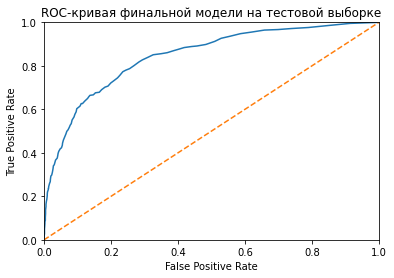

In [497]:
# построим ROC-кривую финальной модели 
fpr_RFC_final_test, tpr_RFC_final_test, thresholds = roc_curve(
    target_test, probabilities_one_valid_RFC_final_test)

plt.figure()
plt.plot(fpr_RFC_final_test, tpr_RFC_final_test, linestyle='solid')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая финальной модели на тестовой выборке')
plt.show()

ROC-кривая (Receiver Operating Characteristic curve) как графическое представление производительности модели классификации, отображает зависимость между долей верных положительных результатов (True Positive Rate, TPR) и долей ложных положительных результатов (False Positive Rate, FPR) при варьировании порога классификации.
<br>
<br>
Расположение ROC-кривой как в данном случае говорит о высокой производительности модели. Чем ближе ROC-кривая к левому верхнему углу, тем выше ее качество и способность модели различать классы и делать правильные предсказания.
<br>
<br>
Также данную ROC-кривую можно назвать идеальной, так как она проходит через точку (0,1), что означает отсутствие ложно положительных результатов при 100% доле верно положительных результатов.
<br>


Значение F1-меры (F1-score) на тестовой выборке равное 0.6077738515901061 указывает на гармоническое среднее между точностью (precision) и полнотой (recall) модели классификации. F1-мера является метрикой, которая учитывает как точность, так и полноту модели. Такое значение говорит о хорошем качестве модели. 


In [500]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
f1_score(dummy_model.predict(features_test), target_test)

0.3491539413949649

## Общие выводы исследования

**В ходе работы над проектом были достигнуты цели исследования:**
<br>
- построена модель с предельно большим значением F1-меры (модель случайного леса);
- достигнута хорошее значение F1-меры (0.6077738515901061);
- F1-мера проверена на тестовой выборке;
- измерено значение AUC-ROC, сравнивать её значение с F1-мерой.
<br>
<br>

**В процессе исследования:**

- были загружены данные, изучена общую информация о датасете;
- проведена подготовка датасета (удалены некоторые категориальные столбцы, не влияющие на качество обучения, другие категориальные признаки были преобразованы в бинарные с помощью One-Hot Ecnoding,  к столбцам с количественными признаками применено масштабирование);
- датафрейм был подготовлен к дальнейшей работе;
- исследован баланс классов; 
- обучены модели без учёта дисбаланса, найдена самая потенциально успешная (модель случайного леса);
- оценён дисбаланс классов (4:1);
- для борьбы с дисбалансом классов было применено 3 метода: взвешивание классов, увеличение выборки (upsampling), уменьшение выборки (downsampling), лучше всех показала себя методика upsampling;
- обучены и улучшены разные модели с учётом дисбланаса классов, выбрана лучшая (также модель модель случайного леса);
- проведено финальное тестирование на тестовой выборке;
- достигнуты значения метрики F1-score = 0.6077738515901061.
<br>